<a href="https://colab.research.google.com/github/mastersigat/GeoPandas/blob/main/S%C3%A9ance_1_(intro_Pandas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séance 1 / Introduction à pandas

## Configuration de l'environnement de travail

https://colab.research.google.com/notebooks/intro.ipynb




In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Instal contextily
!pip install contextily
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos


In [ ]:
#Importation des librairies nécessaires
import pandas as pd #Gestion de données
import matplotlib.pyplot as plt #Visualisation de données
import geopandas as gpd #Gestion données sptiales
import contextily as ctx #Fond de carte
import os
import numpy as np
import shapely

## Téléchargement des données

In [ ]:
#Téléchargement des datas depuis le site opendata de Paris
!wget -O Espacesverts.csv https://opendata.paris.fr/explore/dataset/espaces_verts/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B

In [ ]:
#Téléchargement des datas depuis le site opendata de Paris
!wget -O Espacesverts.csv https://opendata.paris.fr/explore/dataset/espaces_verts/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B

## Exploration du jeux de données des espaces verts


In [5]:
#Importer CSV to dataframe

Espacesverts = pd.read_csv("Espacesverts.csv", sep=';')
Espacesverts.head()

,nsq_espace_vert,nom_ev,type_ev,categorie,adresse_numero,adresse_complement,adresse_typevoie,adresse_libellevoie,adresse_codepostal,poly_area,surface_totale_reelle,surface_horticole,presence_cloture,perimeter,annee_ouverture,annee_renovation,ancien_nom_ev,annee_changement_nom,nb_entites,ouvert_ferme,id_division,id_atelier_horticole,ida3d_enb,site_villes,id_eqpt,competence,geom,url_plan,geom_x_y
0,103.0,JARDIN DES ABORDS DU PETIT PALAIS,Promenades ouvertes,Jardin,14.0,NaN,COURS LA,REINE,75008,6489.0,1280.0,6599.0,Non,446.520694,2006.0,NaN,NaN,NaN,1.0,Oui,104,9.0,46198,3746,4981,CP,"{""type"": ""Polygon"", ""coordinates"": [[[2.314412...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
1,30.0,JARDIN DU PASSAGE DE L'HOTEL DE SENS,Promenades ouvertes,Jardin,8.0,NaN,RUE DES,NONNAINS D HYERES,75004,645.0,620.0,337.0,Oui,149.442539,1957.0,NaN,NaN,NaN,1.0,Non,101,3.0,43320,3369,3394,CA,"{""type"": ""Polygon"", ""coordinates"": [[[2.358755...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
2,827.0,SQUARE RESTIF DE LA BRETONNE,Promenades ouvertes,Square,2.0,NaN,RUE DE LA,BUCHERIE,75005,53.0,43.0,43.0,Oui,37.715443,2000.0,NaN,NaN,NaN,1.0,Non,113,4.0,43795,369,3676,CA,"{""type"": ""Polygon"", ""coordinates"": [[[2.349180...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
3,190.0,SQUARE PHILIPPE FARINE,Promenades ouvertes,Square,12.0,BIS,PASSAGE,GATBOIS,75012,1313.0,1310.0,510.0,Oui,189.327487,1997.0,2010.0,SQUARE DU MAIL GATBOIS,2013.0,1.0,Non,111,15.0,50721,4685,3596,CA,"{""type"": ""Polygon"", ""coordinates"": [[[2.379536...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
4,302.0,JARDIN DU CLOITRE,Promenades ouvertes,Jardin,30.0,NaN,RUE,GUILLEMINOT,75014,1622.0,1650.0,78.0,Non,216.319170,1987.0,NaN,NaN,NaN,1.0,Oui,114,22.0,55529,1484,3385,CA,"{""type"": ""Polygon"", ""coordinates"": [[[2.317526...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN


In [6]:
#Checker les types de champs

Espacesverts.dtypes

nsq_espace_vert          float64
nom_ev                    object
type_ev                   object
categorie                 object
adresse_numero           float64
adresse_complement        object
adresse_typevoie          object
adresse_libellevoie       object
adresse_codepostal         int64
poly_area                float64
surface_totale_reelle    float64
surface_horticole        float64
presence_cloture          object
perimeter                float64
annee_ouverture          float64
annee_renovation         float64
ancien_nom_ev             object
annee_changement_nom     float64
nb_entites               float64
ouvert_ferme              object
id_division                int64
id_atelier_horticole     float64
ida3d_enb                 object
site_villes               object
id_eqpt                   object
competence                object
geom                      object
url_plan                  object
geom_x_y                 float64
dtype: object

In [7]:
#Compter le nombre d'enregistrements

Espacesverts['nsq_espace_vert'].size

2110

In [8]:
#Réorganiser la table (sélection des colonnes importantes)

EspacesvertsOk = Espacesverts[["nsq_espace_vert", "nom_ev", "categorie", "adresse_codepostal", "surface_totale_reelle", "annee_ouverture"]]
EspacesvertsOk.head()

,nsq_espace_vert,nom_ev,categorie,adresse_codepostal,surface_totale_reelle,annee_ouverture
0,103.0,JARDIN DES ABORDS DU PETIT PALAIS,Jardin,75008,1280.0,2006.0
1,30.0,JARDIN DU PASSAGE DE L'HOTEL DE SENS,Jardin,75004,620.0,1957.0
2,827.0,SQUARE RESTIF DE LA BRETONNE,Square,75005,43.0,2000.0
3,190.0,SQUARE PHILIPPE FARINE,Square,75012,1310.0,1997.0
4,302.0,JARDIN DU CLOITRE,Jardin,75014,1650.0,1987.0


In [9]:
# Renommer les noms des champs

EspacesvertsOk.rename(columns={'nsq_espace_vert': 'id','nom_ev': 'nom','adresse_codepostal': 'ardt', 'surface_totale_reelle' : 'surface', 'annee_ouverture': 'ouverture'}, inplace=True)
EspacesvertsOk.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,nom,categorie,ardt,surface,ouverture
0,103.0,JARDIN DES ABORDS DU PETIT PALAIS,Jardin,75008,1280.0,2006.0
1,30.0,JARDIN DU PASSAGE DE L'HOTEL DE SENS,Jardin,75004,620.0,1957.0
2,827.0,SQUARE RESTIF DE LA BRETONNE,Square,75005,43.0,2000.0
3,190.0,SQUARE PHILIPPE FARINE,Square,75012,1310.0,1997.0
4,302.0,JARDIN DU CLOITRE,Jardin,75014,1650.0,1987.0


In [10]:
# Filtrer les données

# Selectioner selon une modalité d'une variable
Jardins = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Jardin')]

# Sélectionner selon deux modalité d'une variable (OR)
Squaresetjardins = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Jardin') | (EspacesvertsOk["categorie"] == 'Square')]

# Selectioner selon une valeur numérique
Grandespacesverts = EspacesvertsOk[(EspacesvertsOk["surface"] >10000)]

#Sélectionner selon les modalités de deux variables (AND)
Squares15eme = Espacesverts[(EspacesvertsOk["ardt"] == 75015) & (EspacesvertsOk["categorie"] == 'Square')]


In [11]:
#Compter le nombre d'enregistrement des sélections

Jardins['id'].size

201

,id
categorie,
Arboretum,1
Archipel,1
Bois,2
Cimetière,21
Decoration,82


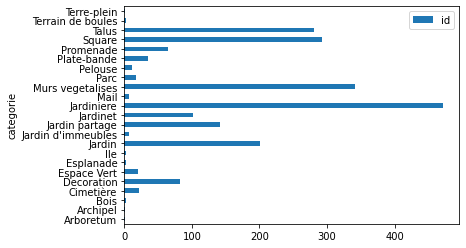

In [12]:
# Regrouper les espaces verts par catégorie avec comptage (GROUP BY)

Categorie = EspacesvertsOk[["categorie", "id"]].groupby("categorie").count()
Categorie.plot(kind="barh")
Categorie.head()

,id
ouverture,
1688.0,1
1791.0,1
1798.0,1
1800.0,1
1804.0,1


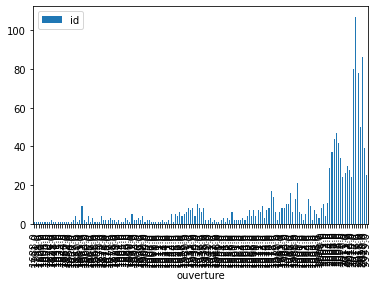

In [13]:
# Regrouper par année d'ouverture

Anneeouverture = EspacesvertsOk[["ouverture", "id"]].groupby("ouverture").count()
Anneeouverture.plot(kind="bar")
Anneeouverture.head()

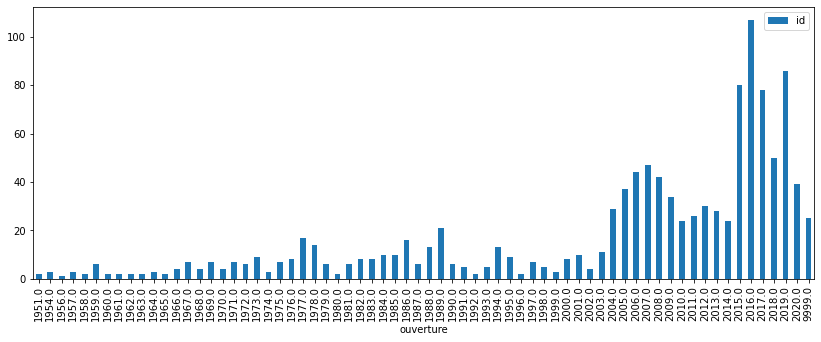

In [41]:
# Regrouper par année d'ouverture depuis 1950

Espacesverts1950 = EspacesvertsOk[(EspacesvertsOk["ouverture"] >1950)]
Espacesvertsannee = Espacesverts1950[["ouverture", "id"]].groupby("ouverture").count()
Espacesvertsannee.plot(figsize =(14,5), kind="bar")


,id
ardt,
75001,14
75002,25
75003,38
75004,60
75005,78


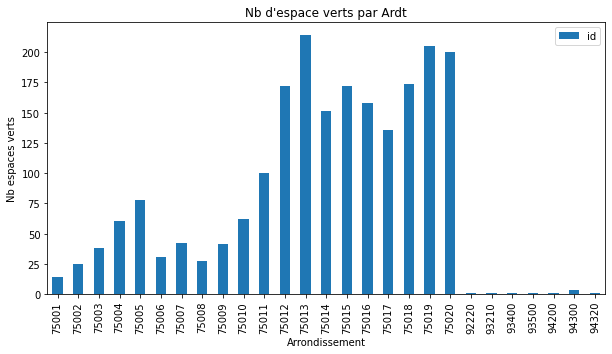

In [42]:
#Compter le nombre d'espaces vert par arrondissement

EspacevertARDT = EspacesvertsOk[["ardt", "id"]].groupby("ardt").count()
EspacevertARDT.plot(figsize =(10,5), kind="bar")
plt.title("Nb d'espace verts par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb espaces verts")
EspacevertARDT.head()

,id
ardt,
75001,14
75002,25
75003,38
75004,60
75005,78


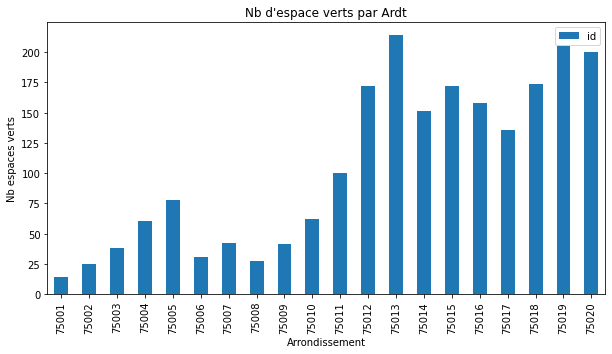

In [54]:
#Ne garder que les arrondissement de Paris

EspacevertsParis = EspacesvertsOk[(EspacesvertsOk["ardt"] <76000)]

EspacevertsParisardt = EspacevertsParis[["ardt", "id"]].groupby("ardt").count()
EspacevertsParisardt.plot(figsize =(10,5), kind="bar")
plt.title("Nb d'espace verts par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb espaces verts")
EspacevertsParisardt.head()

In [20]:
# Calculer la surface moyenne des squares

Squares = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Square')]
Squares["surface"].mean()

4188.716723549488

In [38]:
# Calculer la surface moyenne des jardins

Jardins = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Jardin')]
Jardins["surface"].mean()

8790.272727272728

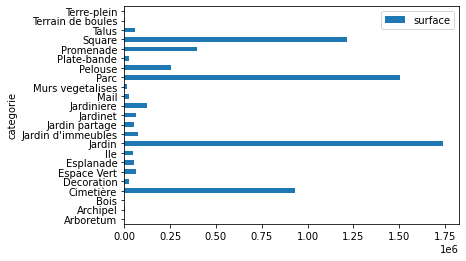

In [59]:
# Calculer la surface moyenne de chaque type d'espace vert

SurfaceType = EspacevertsParis[["categorie", "surface"]].groupby("categorie").sum()
SurfaceType.head()
SurfaceType.plot(kind="barh")


,surface
ardt,
75001,48987.0
75002,3485.0
75003,28212.0
75004,68286.0
75005,84298.0


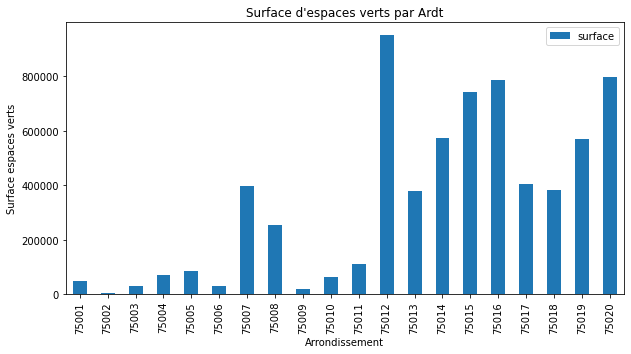

In [60]:
#Calculer la superficie des espaces vert par arrondissement (agrégation statistique)

SurfaceEspacevertARDT = EspacevertsParis[["ardt", "surface"]].groupby("ardt").sum()
SurfaceEspacevertARDT.plot(figsize =(10,5), kind="bar")
plt.title("Surface d'espaces verts par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Surface espaces verts")
SurfaceEspacevertARDT.head()

In [61]:
#Verifications

totalsurface = EspacesvertsOk['surface'].sum()
print(totalsurface)

totalsurface2 = SurfaceEspacevertARDT['surface'].sum()
print(totalsurface2)

9998565.0
6687315.0


## Exercices autour des lieux de tournage

**URL des Données**

https://opendata.paris.fr/explore/dataset/lieux-de-tournage-a-paris/information/?disjunctive.type_tournage&disjunctive.nom_tournage&disjunctive.nom_realisateur&disjunctive.nom_producteur&disjunctive.ardt_lieu&basemap=jawg.dark&location=15,48.87476,2.36187

* Combien de tournage dans le jeu de données
* Combien de tournage de films
* Combien de tournages de films dans le 16eme arrondissement
* Combien de tournages de séries dans le 1er arrondissement
* Faire un graphique du nombre de tournage par type
* Faire un graphique du nombre de tournage par arrondissement

In [29]:
#Téléchargement des datas depuis le site opendata de Paris
!wget -O tournages.csv https://opendata.paris.fr/explore/dataset/lieux-de-tournage-a-paris/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B 

--2021-03-01 20:26:35--  https://opendata.paris.fr/explore/dataset/lieux-de-tournage-a-paris/download/?format=csv
Resolving opendata.paris.fr (opendata.paris.fr)... 34.248.20.69, 34.249.199.226
Connecting to opendata.paris.fr (opendata.paris.fr)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘tournages.csv’

tournages.csv           [                 <=>]   2.28M   527KB/s    in 4.4s    

2021-03-01 20:26:40 (527 KB/s) - ‘tournages.csv’ saved [2389303]



In [30]:
#Importer CSV to dataframe

tournages = pd.read_csv("tournages.csv", sep=';')
tournages.head()

,id_lieu,annee_tournage,type_tournage,nom_tournage,nom_realisateur,nom_producteur,adresse_lieu,ardt_lieu,date_debut,date_fin,coord_x,coord_y,geo_shape,geo_point_2d
0,2018-1366,2018,Long métrage,LA VERITE SI JE MENS LES DEBUTS,Michel MUNZ et Gérard BITTON,LA VERITE PRODUCTION,"rue edmond about, 75116 paris",75116.0,2018-11-08,2018-11-08,2.273891,48.862604,"{""type"": ""Point"", ""coordinates"": [2.2738905444...","48.8626043783,2.27389054441"
1,2019-685,2019,Long métrage,Maoussi,Charlotte Schiøler,C.S. Productions,"63 rue de belleville, 75019 paris",75019.0,2019-06-18,2019-06-18,2.382256,48.873419,"{""type"": ""Point"", ""coordinates"": [2.3822563279...","48.8734189019,2.38225632792"
2,2019-686,2019,Long métrage,Maoussi,Charlotte Schiøler,C.S. Productions,"87 rue de ménilmontant, 75020 paris",75020.0,2019-06-18,2019-06-18,2.390458,48.868945,"{""type"": ""Point"", ""coordinates"": [2.3904579308...","48.8689453903,2.39045793086"
3,2019-688,2019,Long métrage,TOUT SIMPLEMENT NOIR,JEAN PASCAL ZADI ET JOHN WAXXX,GAUMONT,"rue edouard vii, 75009 paris",75009.0,2019-06-12,2019-06-12,2.329043,48.870095,"{""type"": ""Point"", ""coordinates"": [2.3290434773...","48.8700952316,2.32904347732"
4,2019-704,2019,Long métrage,CHACUN CHEZ SOI !,Michèle Laroque,ALTER FILMS - CHACUN CHEZ SOI !,"10 avenue de camoëns, 75116 paris",75116.0,2019-06-20,2019-06-20,2.286219,48.859759,"{""type"": ""Point"", ""coordinates"": [2.2862189455...","48.859758899,2.28621894558"


,type_tournage
ardt_lieu,
75001.0,497
75002.0,219
75003.0,164
75004.0,497
75005.0,469


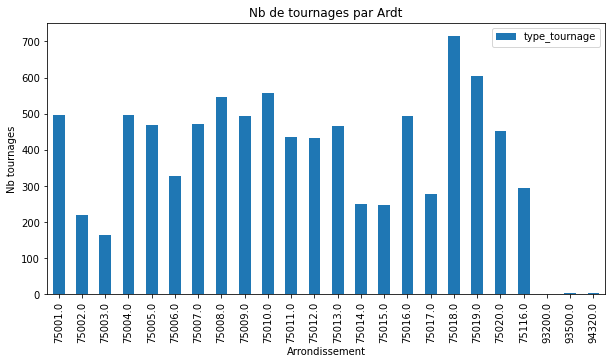

In [31]:
#Compter le nombre de tournages par arrondissement

tournagesARDT = tournages[["ardt_lieu", "type_tournage"]].groupby("ardt_lieu").count()
tournagesARDT.plot(figsize =(10,5), kind="bar")
plt.title("Nb de tournages par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb tournages")
tournagesARDT.head()

,ardt_lieu
type_tournage,
Long métrage,5013
Série TV,3056
Série Web,380
Téléfilm,469


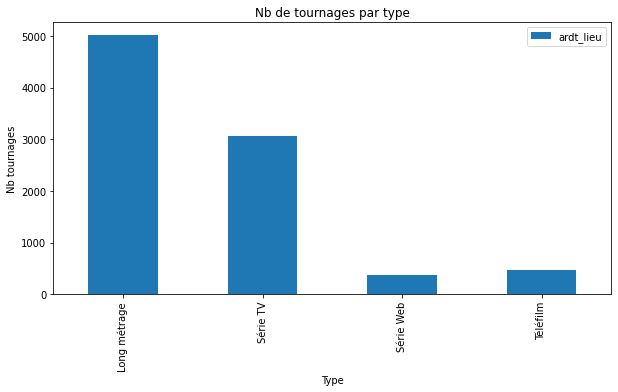

In [32]:
#Compter le nombre de tournages par type

tournagesTYPE = tournages[["type_tournage", "ardt_lieu"]].groupby("type_tournage").count()
tournagesTYPE.plot(figsize =(10,5), kind="bar")
plt.title("Nb de tournages par type")
plt.xlabel("Type")
plt.ylabel("Nb tournages")
tournagesTYPE.head()

## Transformer csv en geodataframe

In [33]:
#Téléchargement des datas depuis le site opendata de Paris

!wget -O toilettes.csv https://opendata.paris.fr/explore/dataset/sanisettesparis/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B


--2021-03-01 20:27:09--  https://opendata.paris.fr/explore/dataset/sanisettesparis/download/?format=csv
Resolving opendata.paris.fr (opendata.paris.fr)... 34.249.199.226, 34.248.20.69
Connecting to opendata.paris.fr (opendata.paris.fr)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘toilettes.csv’

toilettes.csv           [ <=>                ] 124.74K   635KB/s    in 0.2s    

2021-03-01 20:27:10 (635 KB/s) - ‘toilettes.csv’ saved [127729]



In [35]:
#Importer CSV to dataframe

toilettes = pd.read_csv("toilettes.csv", sep=';')
toilettes.head()

,type,statut,adresse,arrondissement,horaire,acces_pmr,relais_bebe,url_fiche_equipement,geo_shape,geo_point_2d
0,SANISETTES,Fermé,88 AVENUE DU MAINE,14,6 h - 1 h,Oui,NaN,NaN,"{""type"": ""MultiPoint"", ""coordinates"": [[2.3223...","48.838110613,2.32233836205"
1,SANISETTES,Fermé,RUE SAINT CHARLES,15,6 h - 22 h,Oui,NaN,NaN,"{""type"": ""MultiPoint"", ""coordinates"": [[2.2779...","48.838073563,2.27798287108"
2,SANISETTES,Fermé,170 AVENUE DE VERSAILLES,16,6 h - 22 h,Oui,NaN,NaN,"{""type"": ""MultiPoint"", ""coordinates"": [[2.2630...","48.8398553812,2.26307814089"
3,SANISETTES,Fermé,51 BOULEVARD GOUVION SAINT CYR,17,6 h - 22 h,Oui,NaN,NaN,"{""type"": ""MultiPoint"", ""coordinates"": [[2.2860...","48.881884193,2.28601752567"
4,SANISETTES,Fermé,1 RUE SAINT BRUNO,18,24 h / 24,Oui,NaN,NaN,"{""type"": ""MultiPoint"", ""coordinates"": [[2.3562...","48.885957541,2.35627051059"


In [36]:
#Séparer la columne des coordonnées géographiques

toilettes[['Latitude','Longitude']] = toilettes['geo_point_2d'].str.split(',', expand=True)
toilettes.head()

,type,statut,adresse,arrondissement,horaire,acces_pmr,relais_bebe,url_fiche_equipement,geo_shape,geo_point_2d,Latitude,Longitude
0,SANISETTES,Fermé,88 AVENUE DU MAINE,14,6 h - 1 h,Oui,NaN,NaN,"{""type"": ""MultiPoint"", ""coordinates"": [[2.3223...","48.838110613,2.32233836205",48.838110613,2.32233836205
1,SANISETTES,Fermé,RUE SAINT CHARLES,15,6 h - 22 h,Oui,NaN,NaN,"{""type"": ""MultiPoint"", ""coordinates"": [[2.2779...","48.838073563,2.27798287108",48.838073563,2.27798287108
2,SANISETTES,Fermé,170 AVENUE DE VERSAILLES,16,6 h - 22 h,Oui,NaN,NaN,"{""type"": ""MultiPoint"", ""coordinates"": [[2.2630...","48.8398553812,2.26307814089",48.8398553812,2.26307814089
3,SANISETTES,Fermé,51 BOULEVARD GOUVION SAINT CYR,17,6 h - 22 h,Oui,NaN,NaN,"{""type"": ""MultiPoint"", ""coordinates"": [[2.2860...","48.881884193,2.28601752567",48.881884193,2.28601752567
4,SANISETTES,Fermé,1 RUE SAINT BRUNO,18,24 h / 24,Oui,NaN,NaN,"{""type"": ""MultiPoint"", ""coordinates"": [[2.3562...","48.885957541,2.35627051059",48.885957541,2.35627051059


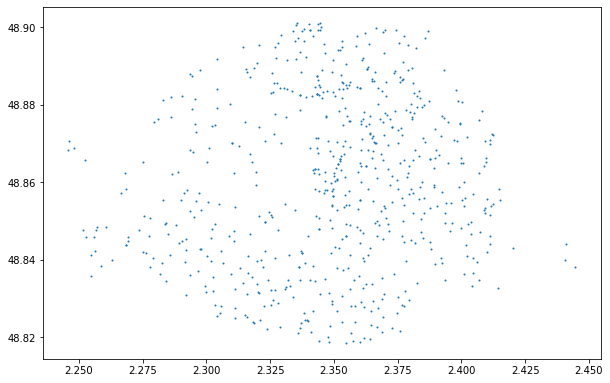

In [37]:
#Dataframe to GeoDataframe

toilettes = gpd.GeoDataFrame(toilettes, crs = 'epsg:4326', geometry=gpd.points_from_xy(toilettes.Longitude, toilettes.Latitude))
toilettes.plot(figsize=(10,12), markersize=1)

## Exercices autour du jeu de données des arbres



URL : https://opendata.paris.fr/explore/dataset/les-arbres/information/?disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable

* Importer le dataset des arbres  
* Compter le nombre d'abres
* Restructurer le jeu de données (sélection de variables et renommage) > "idbase", "domanialite", "arrondissement", "libellefrancais", "hauteurenm", "geo_point_2d"
* Proposer une visualisation du nb d'arbres par arrondissement
* Proposer une visualisation du nb d'arbres par domanialité
* Proposer une visualisation de la hauteur moyenne par type
* Proposer une visualisation de la hauteur moyenne par arrondissement
* Créer un géodataframe 
* Faire une carte avec uniquement les chênes, les erables et les frênes



In [ ]:
#Téléchargement des datas depuis l'opendata
!wget -O arbres.csv https://opendata.paris.fr/explore/dataset/les-arbres/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B 

--2021-03-01 13:50:51--  https://opendata.paris.fr/explore/dataset/les-arbres/download/?format=csv
Resolving opendata.paris.fr (opendata.paris.fr)... 34.248.20.69, 34.249.199.226
Connecting to opendata.paris.fr (opendata.paris.fr)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘arbres.csv’

arbres.csv              [  <=>               ]  30.16M   294KB/s    in 1m 50s  

2021-03-01 13:52:44 (281 KB/s) - ‘arbres.csv’ saved [31621783]



In [ ]:
#Importer CSV to dataframe

arbres = pd.read_csv("arbres.csv", sep=';')
arbres.head()

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
0,2029277,Arbre,DJS,PARIS 19E ARRDT,NaN,NaN,CENTRE SPORTIF JULES LADOUMEGUE / 35 ROUTE DES...,000104004,Copalme,Liquidambar,styraciflua,NaN,20,5,J,NON,"48.8910678703,2.39818911237"
1,251547,Arbre,Alignement,PARIS 16E ARRDT,NaN,NaN,AVENUE DU PRESIDENT WILSON,000303003,Platane,Platanus,x hispanica,NaN,205,20,A,NON,"48.8649086201,2.2993502247"
2,282670,Arbre,Alignement,PARIS 8E ARRDT,NaN,NaN,AVENUE PERCIER,000202005,Platane,Platanus,x hispanica,NaN,86,12,A,NON,"48.8740816418,2.31454494358"
3,185672,Arbre,DASCO,PARIS 20E ARRDT,NaN,NaN,ECOLE ELEMENTAIRE / 24 RUE OLIVIER METRA,098501015,Bouleau,Betula,pendula,NaN,75,12,J,NON,"48.8732579515,2.3942408403"
4,219422,Arbre,Alignement,PARIS 8E ARRDT,NaN,NaN,BOULEVARD HAUSSMANN,003202007,Platane,Platanus,x hispanica,NaN,54,9,A,NON,"48.8751388795,2.31742365137"


In [ ]:
#Compter le nombre d'arbres

arbres['domanialite'].size

204909

In [ ]:
#Réorganiser la table

arbresok = arbres[["idbase", "domanialite", "arrondissement", "libellefrancais", "hauteurenm", "geo_point_2d"]]
arbresok.head()

,idbase,domanialite,arrondissement,libellefrancais,hauteurenm,geo_point_2d
0,2029277,DJS,PARIS 19E ARRDT,Copalme,5,"48.8910678703,2.39818911237"
1,251547,Alignement,PARIS 16E ARRDT,Platane,20,"48.8649086201,2.2993502247"
2,282670,Alignement,PARIS 8E ARRDT,Platane,12,"48.8740816418,2.31454494358"
3,185672,DASCO,PARIS 20E ARRDT,Bouleau,12,"48.8732579515,2.3942408403"
4,219422,Alignement,PARIS 8E ARRDT,Platane,9,"48.8751388795,2.31742365137"


In [ ]:
# Renommer les champs

arbresok.rename(columns={'idbase': 'id','libellefrancais': 'type','hauteurenm': 'hauteur'}, inplace=True)
arbresok.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,domanialite,arrondissement,type,hauteur,geo_point_2d
0,2029277,DJS,PARIS 19E ARRDT,Copalme,5,"48.8910678703,2.39818911237"
1,251547,Alignement,PARIS 16E ARRDT,Platane,20,"48.8649086201,2.2993502247"
2,282670,Alignement,PARIS 8E ARRDT,Platane,12,"48.8740816418,2.31454494358"
3,185672,DASCO,PARIS 20E ARRDT,Bouleau,12,"48.8732579515,2.3942408403"
4,219422,Alignement,PARIS 8E ARRDT,Platane,9,"48.8751388795,2.31742365137"


,id
arrondissement,
BOIS DE BOULOGNE,4117
BOIS DE VINCENNES,11835
HAUTS-DE-SEINE,5417
PARIS 10E ARRDT,3408
PARIS 11E ARRDT,5908


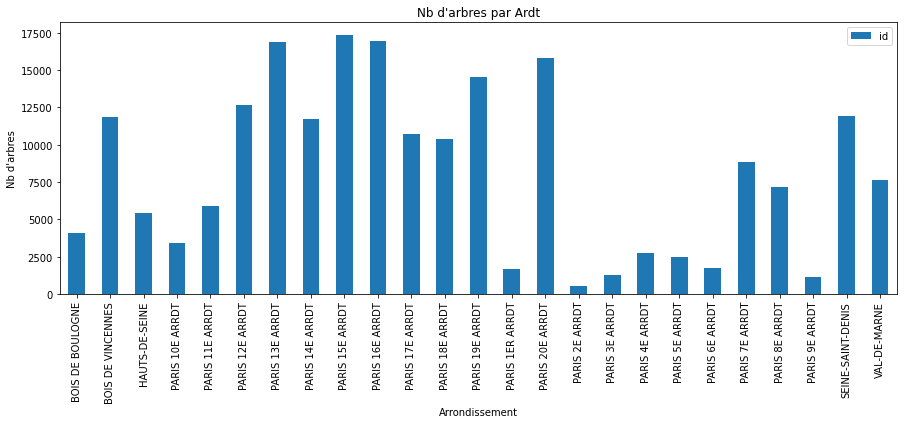

In [ ]:
#Compter le nombre d'arbres par arrondissement

ArbresARDT = arbresok[["arrondissement", "id"]].groupby("arrondissement").count()
ArbresARDT.plot(figsize =(15,5), kind="bar")
plt.title("Nb d'arbres par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb d'arbres")
ArbresARDT.head()


,id
domanialite,
Alignement,106155
CIMETIERE,32161
DAC,27
DASCO,7204
DASES,11


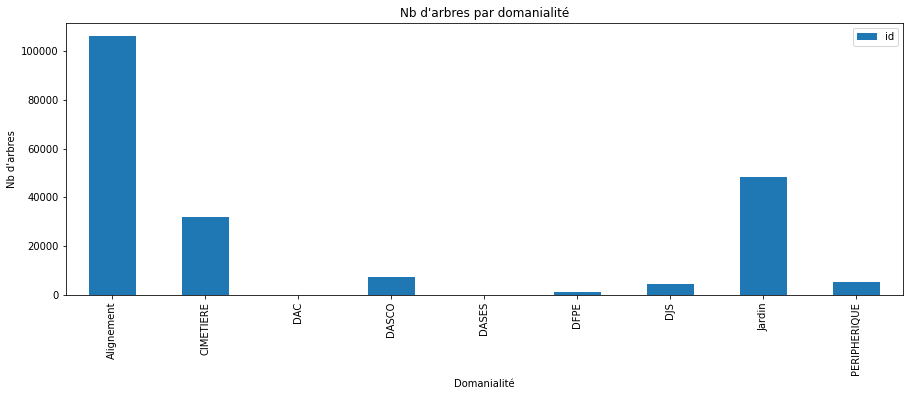

In [ ]:
#Compter le nombre d'arbres par type de domanialité

ArbresDomanialite = arbresok[["domanialite", "id"]].groupby("domanialite").count()
ArbresDomanialite.plot(figsize =(15,5), kind="bar")
plt.title("Nb d'arbres par domanialité")
plt.xlabel("Domanialité")
plt.ylabel("Nb d'arbres")
ArbresDomanialite.head()

,hauteur
type,
Abelia,5.500000
Abricotier,2.379310
Abricotier fruit,2.000000
Ailante,8.520373
Alangium,2.333333


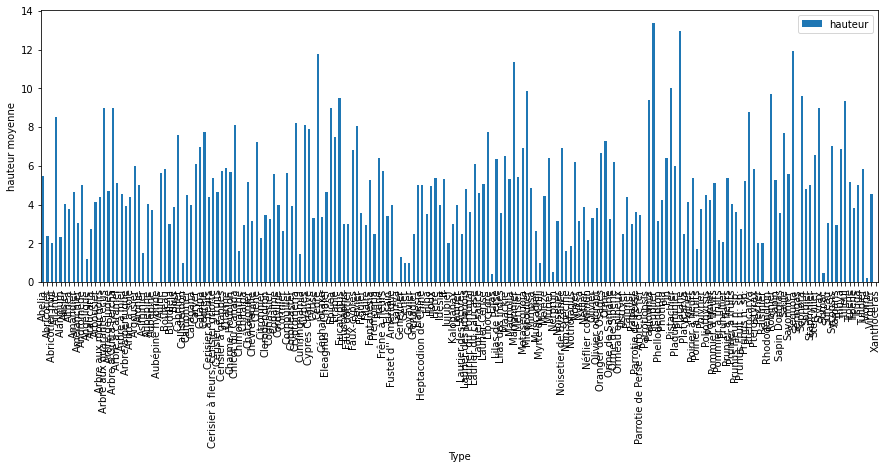

In [ ]:
# Calculer la hauteur moyenne des arbres par type d'arbres

HauteurType = arbresok[["type", "hauteur"]].groupby("type").mean()
HauteurType.plot(figsize =(15,5), kind="bar")
plt.xlabel("Type")
plt.ylabel("hauteur moyenne")
HauteurType.head()

,hauteur
arrondissement,
BOIS DE BOULOGNE,13.334224
BOIS DE VINCENNES,9.467596
HAUTS-DE-SEINE,2.106147
PARIS 10E ARRDT,10.675176
PARIS 11E ARRDT,10.854096


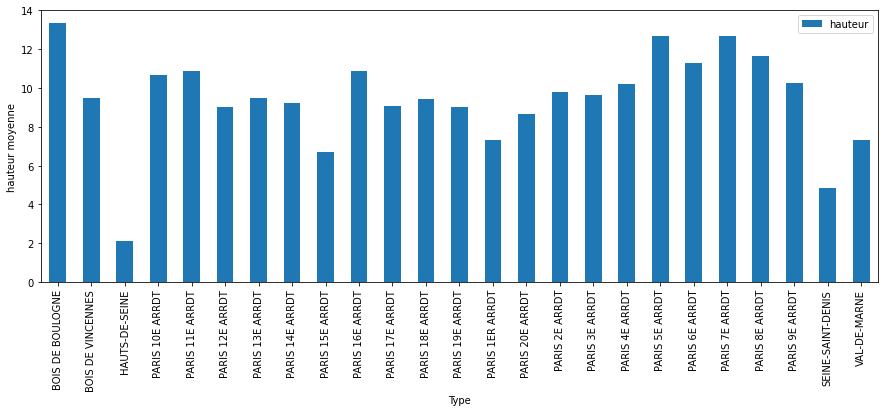

In [ ]:
# Calculer la hauteur moyenne des arbres par ardt

HauteurType = arbresok[["arrondissement", "hauteur"]].groupby("arrondissement").mean()
HauteurType.plot(figsize =(15,5), kind="bar")
plt.xlabel("Type")
plt.ylabel("hauteur moyenne")
HauteurType.head()

In [ ]:
#Séparer la colonne des coordonnées géographiques

arbresok[['Latitude','Longitude']] = arbresok['geo_point_2d'].str.split(',', expand=True)
arbresok.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id,domanialite,arrondissement,type,hauteur,geo_point_2d,Latitude,Longitude
0,2029277,DJS,PARIS 19E ARRDT,Copalme,5,"48.8910678703,2.39818911237",48.8910678703,2.39818911237
1,251547,Alignement,PARIS 16E ARRDT,Platane,20,"48.8649086201,2.2993502247",48.8649086201,2.2993502247
2,282670,Alignement,PARIS 8E ARRDT,Platane,12,"48.8740816418,2.31454494358",48.8740816418,2.31454494358
3,185672,DASCO,PARIS 20E ARRDT,Bouleau,12,"48.8732579515,2.3942408403",48.8732579515,2.3942408403
4,219422,Alignement,PARIS 8E ARRDT,Platane,9,"48.8751388795,2.31742365137",48.8751388795,2.31742365137


In [ ]:
# Ne garder que les chênes, les Erables et les  Frênes

Arbresselect = arbresok[(arbresok["type"] == 'Chêne') | (arbresok["type"] == 'Erable')| (arbresok["type"] == 'Frêne')]
Arbresselect.head()

,id,domanialite,arrondissement,type,hauteur,geo_point_2d,Latitude,Longitude
13,229337,Alignement,PARIS 16E ARRDT,Chêne,6,"48.8424636191,2.25577123939",48.8424636191,2.25577123939
24,131445,Jardin,PARIS 15E ARRDT,Erable,0,"48.8299320401,2.27428795161",48.8299320401,2.27428795161
42,312555,Jardin,PARIS 8E ARRDT,Erable,10,"48.8790253976,2.30733282782",48.8790253976,2.30733282782
64,214223,Alignement,PARIS 14E ARRDT,Frêne,8,"48.8198742284,2.34410853627",48.8198742284,2.34410853627
84,108440,Jardin,PARIS 16E ARRDT,Erable,17,"48.8599544085,2.28785356435",48.8599544085,2.28785356435


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cc1bd14d0>],
      dtype=object)

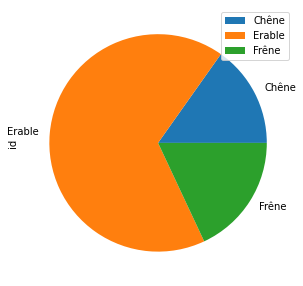

In [ ]:
# Visualisation (pie)

les3arbres = Arbresselect[["type", "id"]].groupby("type").count()
les3arbres.plot.pie(y='id', figsize=(5, 5), subplots=True)

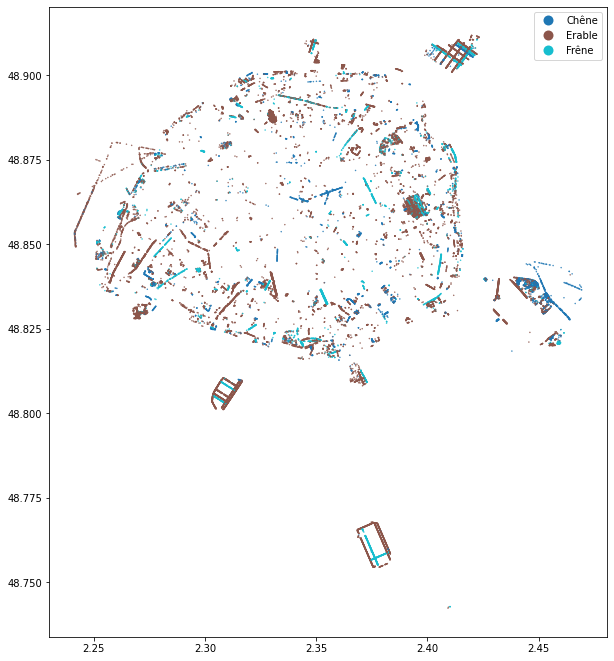

In [ ]:
#Dataframe to GeoDataframe

Arbresselect = gpd.GeoDataFrame(Arbresselect, crs = 'epsg:4326', geometry=gpd.points_from_xy(Arbresselect.Longitude, Arbresselect.Latitude))
Arbresselect.plot(figsize=(10,12), markersize=0.2, column = "type", legend = 'true')